<a href="https://colab.research.google.com/github/cesong2/Display-Sensor/blob/Jinsup/AI4I_2020_Jinsup_230216.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 전체 DATA 전처리 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc('font', family='NanumBarunGothic') 

In [2]:
df = pd.read_csv('./ai4i2020.csv')

In [3]:
df.head(3)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [5]:
# 전체 데이터 갯수, 평균 등 파악  
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [6]:
# 변수 컬럼명 변경
# 변수 단위 Air temperature (켈빈온도), Process temperature (켈빈온도), 
# Rotational speed (분당회전수), Torque (회전력/Nm:뉴턴미터) Tool wear (공구 마모 시간/분)
df.rename(columns={'Air temperature [K]':'Air temperature',
                   'Process temperature [K]':'Process temperature',
                   'Rotational speed [rpm]':'Rotational speed',
                   'Torque [Nm]':'Torque',
                   'Tool wear [min]':'Tool wear'},inplace=True)
df.head(3)

,UDI,Product ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0


In [7]:
# 불필요한 컬럼 (제품번호 등) 제거 
# process temp 은 ait temp 에 10도를 더한 값이나 분석에 필요할 것으로 생각되어 제거하지 않음 
df.drop(['UDI','Product ID'], axis=1, inplace=True)

In [8]:
# 온도 단위 변경 / 캘빈 -> 섭씨 / 소수점 1자리
df['Air temperature']=df['Air temperature'].apply(lambda x: x- 273.15).round(1)
df['Process temperature']=df['Process temperature'].apply(lambda x: x- 273.15).round(1)
df.head(3)

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
0,M,25.0,35.5,1551,42.8,0,0,0,0,0,0,0
1,L,25.1,35.6,1408,46.3,3,0,0,0,0,0,0
2,L,25.0,35.4,1498,49.4,5,0,0,0,0,0,0


## 2. failure 유,무 DATA 전처리 


In [9]:
# failure 유무 별 데이터 갯수, 평균 등 파악  
df.groupby('Machine failure').describe()

Air temperature                                               \
                          count       mean       std   min   25%   50%   75%   
Machine failure                                                                
0                        9661.0  26.863234  1.991327  22.2  25.2  26.9  28.4   
1                         339.0  27.771976  2.069605  22.5  26.0  28.5  29.4   

                      Process temperature             ...  OSF          RNF  \
                  max               count       mean  ...  75%  max   count   
Machine failure                                       ...                     
0                31.4              9661.0  36.884577  ...  0.0  0.0  9661.0   
1                31.2               339.0  37.178466  ...  1.0  1.0   339.0   

                                                              
                     mean       std  min  25%  50%  75%  max  
Machine failure                                               
0                0.001863  0.043126  0.0  0.0  0.0  0.0  1.0  
1                0.002950  0.054313  0.0  0.0  0.0  0.0  1.0  

[2 rows x 80 columns]

In [10]:
# 분석에서 제외할 TWF 공구 마모 failure 46개, RNF 랜덤 failure 19개 데이터 파악
df.groupby('Machine failure').sum()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
Machine failure,,,,,,,,,,
0,259525.7,356341.9,14880452,382862.1,1030768,0,0,0,0,18
1,9414.7,12603.5,507309,17007.0,48742,46,115,95,98,1


In [11]:
# failure 유형별 Data 생성
df_TWF = df.loc[df['TWF'] == 1].copy()
df_HDF = df.loc[df['HDF'] == 1].copy()
df_PWF = df.loc[df['PWF'] == 1].copy()
df_OSF = df.loc[df['OSF'] == 1].copy()
df_RNF = df.loc[df['RNF'] == 1].copy()

In [12]:
# failure 분석을 위한 Data 생성 (TWF, RNF 삭제)
# RNF 데이터 총 19개 이나 TWF 행 데이터 제거시 RNF 데이터 1개 같이 삭제되어 18개만 삭제  
df_failure = df.drop(df[(df['TWF']==1) | (df['RNF']==1)].index) 
df_failure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9936 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Type                 9936 non-null   object 
 1   Air temperature      9936 non-null   float64
 2   Process temperature  9936 non-null   float64
 3   Rotational speed     9936 non-null   int64  
 4   Torque               9936 non-null   float64
 5   Tool wear            9936 non-null   int64  
 6   Machine failure      9936 non-null   int64  
 7   TWF                  9936 non-null   int64  
 8   HDF                  9936 non-null   int64  
 9   PWF                  9936 non-null   int64  
 10  OSF                  9936 non-null   int64  
 11  RNF                  9936 non-null   int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1009.1+ KB


In [13]:
# TWF, RNF 컬럼 삭제
df_failure.drop(['TWF', 'RNF'], axis= 1, inplace=True)

In [14]:
#failre 별 합계 컬럼 생성
df_failure['Failure Total'] = df['HDF'] + df['PWF'] + df['OSF']
df_failure.head(3)  

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,HDF,PWF,OSF,Failure Total
0,M,25.0,35.5,1551,42.8,0,0,0,0,0,0
1,L,25.1,35.6,1408,46.3,3,0,0,0,0,0
2,L,25.0,35.4,1498,49.4,5,0,0,0,0,0


## 2-1 Machine failure 발생 데이터 추출 및 분석 

In [15]:
# 전체 데이터 중 failue 비중 
df_mf =df_failure.groupby('Machine failure')
df_count = df_mf.count()
df_count['count'] =  df_count['Type']
df_count.index= ['Non- failure','Failure']

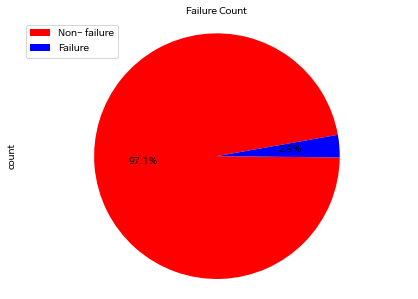

In [16]:
df_count['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['red', 'blue' ,'green'], labels=None) 
plt.title('Failure Count', size=10)
plt.axis('equal')
plt.legend(labels=df_count.index, loc = 'upper left')
plt.show()

In [17]:
# failure 없는 그룹 생성
df_fail_0=df_mf.get_group(0)

In [18]:
df_fail_0.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,HDF,PWF,OSF,Failure Total
count,9643.000000,9643.000000,9643.000000,9643.000000,9643.000000,9643.0,9643.0,9643.0,9643.0,9643.0
mean,26.861755,36.883138,1540.354869,39.622389,106.669086,0.0,0.0,0.0,0.0,0.0
std,1.991531,1.486919,167.471848,9.468446,62.936149,0.0,0.0,0.0,0.0,0.0
min,22.200000,32.600000,1168.000000,12.600000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,25.200000,35.700000,1429.000000,33.100000,52.000000,0.0,0.0,0.0,0.0,0.0
50%,26.900000,36.900000,1507.000000,39.800000,107.000000,0.0,0.0,0.0,0.0,0.0
75%,28.200000,38.000000,1615.000000,46.300000,160.000000,0.0,0.0,0.0,0.0,0.0
max,31.400000,40.700000,2695.000000,70.000000,246.000000,0.0,0.0,0.0,0.0,0.0


In [19]:
# failure 있는 그룹 생성
df_fail_1=df_mf.get_group(1)

In [20]:
 df_fail_1.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,HDF,PWF,OSF,Failure Total
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000,293.000000,293.000000
mean,27.864505,37.197952,1485.546075,52.104096,132.385666,1.0,0.392491,0.320819,0.324232,1.037543
std,2.076228,1.343552,405.111039,16.320862,71.724965,0.0,0.489141,0.467590,0.468888,0.312891
min,22.500000,33.000000,1181.000000,3.800000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
25%,26.000000,36.600000,1321.000000,48.800000,69.000000,1.0,0.000000,0.000000,0.000000,1.000000
50%,28.700000,37.200000,1359.000000,55.000000,144.000000,1.0,0.000000,0.000000,0.000000,1.000000
75%,29.500000,38.100000,1386.000000,62.000000,201.000000,1.0,1.000000,1.000000,1.000000,1.000000
max,30.900000,40.100000,2886.000000,76.600000,251.000000,1.0,1.000000,1.000000,1.000000,2.000000


## 2-2 failure 발생 유형과 변수간의 상관관계 분석 

In [21]:
# failure Total 과 5가지 변수들의 상관 관계 분석
df_fail_1[['Failure Total','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,Failure Total,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
Failure Total,1.000000,0.037906,-0.020183,-0.092374,0.238713,0.189492
Air temperature,0.037906,1.000000,0.852737,-0.142160,-0.006598,-0.222754
Process temperature,-0.020183,0.852737,1.000000,-0.083679,0.001859,-0.112615
Rotational speed,-0.092374,-0.142160,-0.083679,1.000000,-0.904965,-0.154020
Torque,0.238713,-0.006598,0.001859,-0.904965,1.000000,0.113984
Tool wear,0.189492,-0.222754,-0.112615,-0.154020,0.113984,1.000000


In [22]:
data_failure_Total = df_fail_1[['Failure Total','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


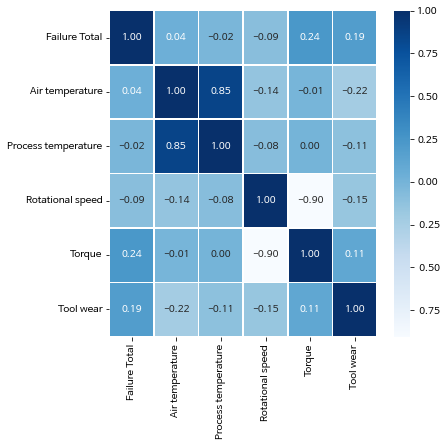

In [23]:
# failure Total 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_failure_Total.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 1.0, 'Machine failure')

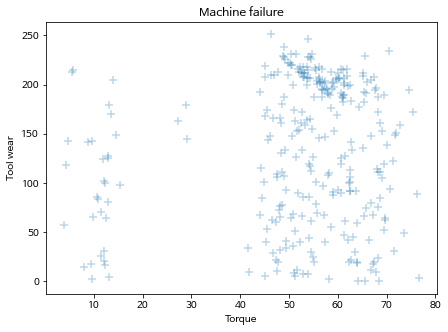

In [24]:
# failure 발생 주요 요인 산점도 분석 (Torque, Tool wear)
df_fail_1.plot(kind='scatter', x='Torque', y='Tool wear', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.xlabel('Torque') 
plt.title('Machine failure')

In [25]:
# HDF(heat dissipation) 와 5가지 변수들의 상관 관계 분석 
# -> 공기 온도,  회전력에 영향  
df_fail_1[['HDF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,HDF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
HDF,1.000000,0.611986,0.285232,-0.294717,0.052434,-0.282823
Air temperature,0.611986,1.000000,0.852737,-0.142160,-0.006598,-0.222754
Process temperature,0.285232,0.852737,1.000000,-0.083679,0.001859,-0.112615
Rotational speed,-0.294717,-0.142160,-0.083679,1.000000,-0.904965,-0.154020
Torque,0.052434,-0.006598,0.001859,-0.904965,1.000000,0.113984
Tool wear,-0.282823,-0.222754,-0.112615,-0.154020,0.113984,1.000000


In [26]:
data_HDF = df_fail_1[['HDF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


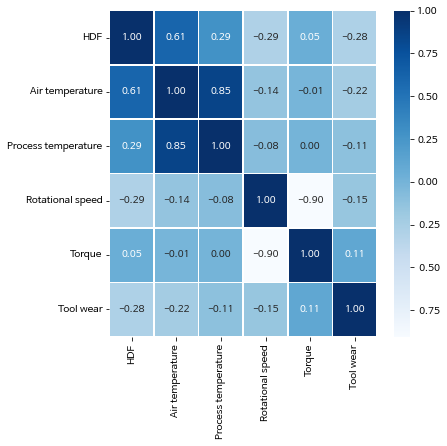

In [27]:
# HDF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_HDF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 0, 'Torque')

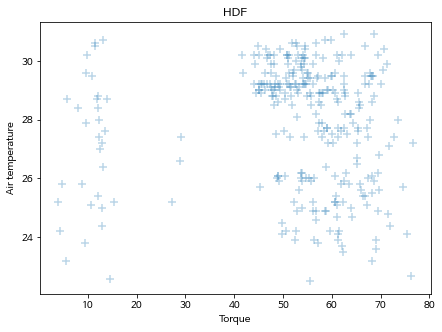

In [28]:
# HDF 주요 요인 산점도 분석 (Torque, Air temperature)
df_fail_1.plot(kind='scatter', x='Torque', y='Air temperature', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.title('HDF')
plt.xlabel('Torque')

In [29]:
# PWF(power failure) 와 5가지 변수들의 상관 관계 분석 
# -> 회전수 와 양의 관계 회전력과는 상관없음
df_fail_1[['PWF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,PWF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
PWF,1.000000,-0.301832,-0.183203,0.480393,-0.158942,-0.303608
Air temperature,-0.301832,1.000000,0.852737,-0.142160,-0.006598,-0.222754
Process temperature,-0.183203,0.852737,1.000000,-0.083679,0.001859,-0.112615
Rotational speed,0.480393,-0.142160,-0.083679,1.000000,-0.904965,-0.154020
Torque,-0.158942,-0.006598,0.001859,-0.904965,1.000000,0.113984
Tool wear,-0.303608,-0.222754,-0.112615,-0.154020,0.113984,1.000000


In [30]:
data_PWF = df_fail_1[['PWF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


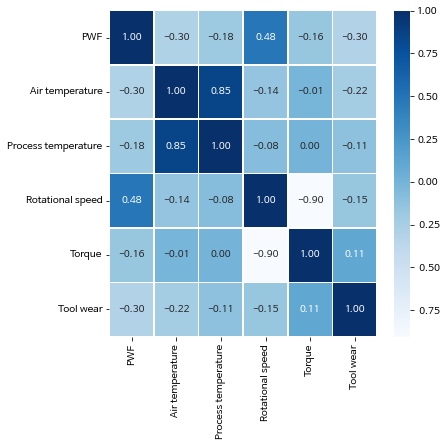

In [31]:
# PWF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_PWF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 0, 'Torque')

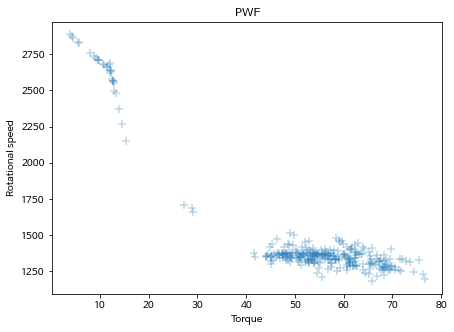

In [32]:
# PWF 주요 요인 산점도 분석 (Rotational speed, Torque)
df_fail_1.plot(kind='scatter', x='Torque', y='Rotational speed', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.title('PWF')
plt.xlabel('Torque')

In [33]:
# OSF(overstrain failure) 와 5가지 변수들의 상관 관계 분석 
# -> 회전력과 공구 마모 시간(TWF 0.395 보다 높음) 영향 
df_fail_1[['OSF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,OSF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
OSF,1.000000,-0.312129,-0.128323,-0.233258,0.263097,0.724255
Air temperature,-0.312129,1.000000,0.852737,-0.142160,-0.006598,-0.222754
Process temperature,-0.128323,0.852737,1.000000,-0.083679,0.001859,-0.112615
Rotational speed,-0.233258,-0.142160,-0.083679,1.000000,-0.904965,-0.154020
Torque,0.263097,-0.006598,0.001859,-0.904965,1.000000,0.113984
Tool wear,0.724255,-0.222754,-0.112615,-0.154020,0.113984,1.000000


In [34]:
data_OSF = df_fail_1[['OSF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


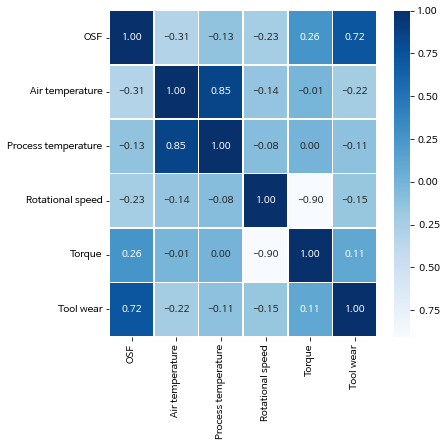

In [35]:
# OSF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_OSF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

Text(0.5, 0, 'Torque')

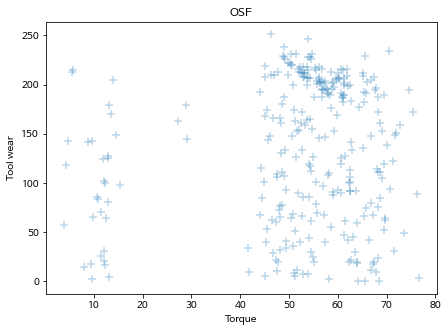

In [36]:
# OSF 주요 요인 산점도 분석 (Tool wear, Torque)
df_fail_1.plot(kind='scatter', x='Torque', y='Tool wear', marker = '+', cmap = 'viridis', s=50, alpha=0.3, figsize=(7,5)) 
plt.title('OSF')
plt.xlabel('Torque')

## 2-4 랜덤 고장 (RNF) 요인 분석

In [37]:
# Machine failure 중 failure 유형이 없는 데이터 9개 확인 및 생성 
df_failure_add = df[(df['Machine failure']==1) & (df['TWF']==0) & (df['HDF']==0) & (df['PWF']==0) & (df['OSF']==0) & (df['RNF']==0)].copy()
df_failure_add

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,H,25.7,36.8,1439,45.2,40,1,0,0,0,0,0
2749,M,26.6,36.1,1685,28.9,179,1,0,0,0,0,0
4044,M,28.8,37.8,1419,47.7,20,1,0,0,0,0,0
4684,M,30.5,38.7,1421,44.8,101,1,0,0,0,0,0
5536,M,29.2,38.7,1363,54.0,119,1,0,0,0,0,0
5941,L,27.5,37.6,1438,48.5,78,1,0,0,0,0,0
6478,L,27.4,36.7,1663,29.1,145,1,0,0,0,0,0
8506,L,25.2,36.5,1710,27.3,163,1,0,0,0,0,0
9015,L,24.1,35.0,1431,49.7,210,1,0,0,0,0,0


In [38]:
# df_failure_add 데이터 값 수정 (Machine failure : 1 -> 0 / RNF : 0 -> 1) 
df_failure_add['Machine failure'].replace(1,0, inplace = True)
df_failure_add['RNF'].replace(0,1, inplace = True)
df_failure_add

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1437,H,25.7,36.8,1439,45.2,40,0,0,0,0,0,1
2749,M,26.6,36.1,1685,28.9,179,0,0,0,0,0,1
4044,M,28.8,37.8,1419,47.7,20,0,0,0,0,0,1
4684,M,30.5,38.7,1421,44.8,101,0,0,0,0,0,1
5536,M,29.2,38.7,1363,54.0,119,0,0,0,0,0,1
5941,L,27.5,37.6,1438,48.5,78,0,0,0,0,0,1
6478,L,27.4,36.7,1663,29.1,145,0,0,0,0,0,1
8506,L,25.2,36.5,1710,27.3,163,0,0,0,0,0,1
9015,L,24.1,35.0,1431,49.7,210,0,0,0,0,0,1


In [ ]:
# df_RNF 데이터 값 수정 (Machine failure : 1 -> 0 / TWF : 1 -> 0) 
df_RNF['Machine failure'].replace(1,0, inplace = True)
df_RNF['TWF'].replace(1,0, inplace = True)
df_RNF

In [49]:
# RNF 데이터에 더해 합치기 (28개 = 9 +19) 
df_RNF_add = pd.concat([df_RNF, df_failure_add])
df_RNF_add

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF
1221,M,23.9,35.2,1399,46.4,132,0,0,0,0,0,1
1302,L,25.5,36.7,1505,45.7,144,0,0,0,0,0,1
1748,H,25.2,34.6,1626,31.1,166,0,0,0,0,0,1
2072,L,26.5,36.4,1570,35.5,189,0,0,0,0,0,1
2559,L,26.2,35.9,1447,50.4,140,0,0,0,0,0,1
3065,M,27.0,36.1,1687,27.7,95,0,0,0,0,0,1
3452,H,28.5,37.4,1602,32.3,2,0,0,0,0,0,1
3611,L,28.6,37.8,1405,46.4,207,0,0,0,0,0,1
5471,L,29.6,39.2,1346,61.2,170,0,0,0,0,0,1
5489,L,29.5,39.0,1499,35.0,215,0,0,0,0,0,1


In [52]:
# 전체 평균값 산출
df_RNF_add.mean()

<ipython-input-52-37d5907d1b29>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_RNF_add.mean()


Air temperature          27.550000
Process temperature      37.482143
Rotational speed       1492.285714
Torque                   43.035714
Tool wear               122.142857
Machine failure           0.000000
TWF                       0.000000
HDF                       0.000000
PWF                       0.000000
OSF                       0.000000
RNF                       1.000000
dtype: float64

In [51]:
# Type 별 Tool ware 의 평균 값
RNF_tabl1 = pd.pivot_table(df_RNF_add, index='RNF', columns='Type', values= 'Tool wear',aggfunc='mean',margins=True)
RNF_tabl1

Type,H,L,M,All
RNF,,,,
1,52.2,147.823529,107.666667,122.142857
All,52.2,147.823529,107.666667,122.142857


In [50]:
# RNF와 5가지 변수들의 상관 관계 분석  ->
df_RNF_add[['RNF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']].corr( ) 

,RNF,Air temperature,Process temperature,Rotational speed,Torque,Tool wear
RNF,NaN,NaN,NaN,NaN,NaN,NaN
Air temperature,NaN,1.000000,0.876996,-0.284601,0.205311,-0.216495
Process temperature,NaN,0.876996,1.000000,-0.391859,0.333390,-0.223895
Rotational speed,NaN,-0.284601,-0.391859,1.000000,-0.938453,0.206113
Torque,NaN,0.205311,0.333390,-0.938453,1.000000,-0.217993
Tool wear,NaN,-0.216495,-0.223895,0.206113,-0.217993,1.000000


In [45]:
data_RNF = df_RNF_add[['RNF','Air temperature' , 'Process temperature', 'Rotational speed','Torque', 'Tool wear']]

In [ ]:
# RNF 상관 관계 heatmap 
plt.figure(figsize=(6,6))
sns.heatmap(data = data_RNF.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

## 3. Type 별 failure 데이터 분석

In [48]:
# type 별 데이터 갯수, 평균 등 파악  
df.groupby('Type').describe()

Air temperature                                                     \
               count       mean       std   min   25%   50%   75%   max   
Type                                                                      
H             1003.0  26.756530  2.023200  22.4  25.1  26.7  28.2  31.1   
L             6000.0  26.904467  1.987958  22.2  25.2  27.0  28.4  31.4   
M             2997.0  26.919186  2.017352  22.2  25.2  27.0  28.5  31.2   

     Process temperature             ...  OSF          RNF            \
                   count       mean  ...  75%  max   count      mean   
Type                                 ...                               
H                 1003.0  36.814158  ...  0.0  1.0  1003.0  0.003988   
L                 6000.0  36.901283  ...  0.0  1.0  6000.0  0.002167   
M                 2997.0  36.907941  ...  0.0  1.0  2997.0  0.000667   

                                         
           std  min  25%  50%  75%  max  
Type                                     
H     0.063056  0.0  0.0  0.0  0.0  1.0  
L     0.046501  0.0  0.0  0.0  0.0  1.0  
M     0.025828  0.0  0.0  0.0  0.0  1.0  

[3 rows x 88 columns]

In [51]:
# Type 별 failure 발생 여부 별 갯수 비교
df_table1 = pd.pivot_table(df_failure, index=['Machine failure','Failure Total'],columns='Type',values='Torque', aggfunc='count', fill_value=0, margins = True)
df_table1  

Type                             H     L     M   All
Machine failure Failure Total                       
0               0              978  5753  2912  9643
1               0                1     4     4     9
                1               13   190    61   264
                2                0    16     4    20
All                            992  5963  2981  9936

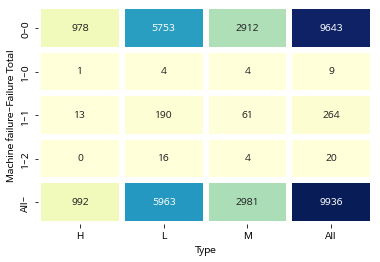

In [52]:
# heat map (Type 별 failure 발생 여부 별 갯수)
sns.heatmap(df_table1, annot=True, fmt='d', cmap='YlGnBu', linewidth=5, cbar = False)  
plt.show()

In [53]:
# failue = 0 의 failure Total type 별 비중 
df_fail_0_count = df_fail_0.groupby('Type').count()
df_fail_0_count['count'] =  df_fail_0_count['Torque']
df_fail_0_count.index= ['H-type','L-type','M-type']

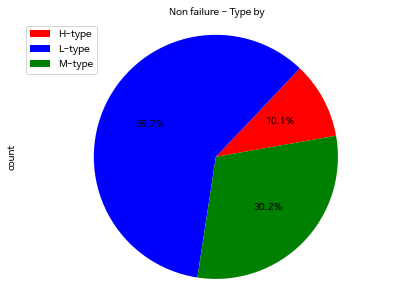

In [54]:
df_fail_0_count['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['red', 'blue' ,'green'], labels=None) 
plt.title('Non failure - Type by', size=10)
plt.axis('equal')
plt.legend(labels=df_fail_0_count.index, loc = 'upper left')
plt.show()

In [55]:
# failue = 1 의 failure Total type 별 비중
df_fail_1_count = df_fail_1.groupby('Type').count()
df_fail_1_count['count'] =  df_fail_1_count['Torque']
df_fail_1_count.index= ['H-type','L-type','M-type']

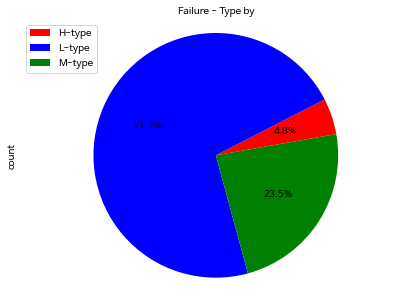

In [56]:
df_fail_1_count['count'].plot(kind='pie', figsize=(7,5), autopct='%1.1f%%', startangle=10, colors=['red', 'blue' ,'green'], labels=None) 
plt.title('Failure - Type by', size=10)
plt.axis('equal')
plt.legend(labels=df_fail_1_count.index, loc = 'upper left')
plt.show()